In [11]:
from ase import Atoms
from ase.build import molecule
from mace.calculators import mace_mp

In [22]:
# 1) Construir la molécula de CO2 con ASE
# Opción rápida:
atoms = molecule('H2O')

# 2) Crear el calculator de MACE-MP
#   model="small"|"medium"|"large" (depende de lo que quieras)
calc = mace_mp(
    model="small",        # o "medium", "large"
    dispersion=False,     # True si quieres corrección de dispersión (si está disponible)
    default_dtype="float32",
    device="cpu"         # o "cpu"
)

# 3) Conectarlo a la molécula
atoms.calc = calc

# 4) Obtener energía y fuerzas
E = atoms.get_potential_energy()     # energía total (eV)
F = atoms.get_forces()               # fuerzas (eV/Å)

print("Energía (eV) =", E)
print("Fuerzas (eV/Å) =\n", F)


Using Materials Project MACE for MACECalculator with C:\Users\danie\.cache\mace/20231210mace128L0_energy_epoch249model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Using head Default out of ['Default']
Default dtype float32 does not match model dtype float64, converting models to float32.


c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\mace\calculators\mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Energía (eV) = -14.047933578491211
Fuerzas (eV/Å) =
 [[ 0.          0.          0.2027491 ]
 [ 0.          0.3334691  -0.10137457]
 [ 0.         -0.3334691  -0.10137457]]


In [23]:
atoms.positions

array([[ 0.      ,  0.      ,  0.119262],
       [ 0.      ,  0.763239, -0.477047],
       [ 0.      , -0.763239, -0.477047]])

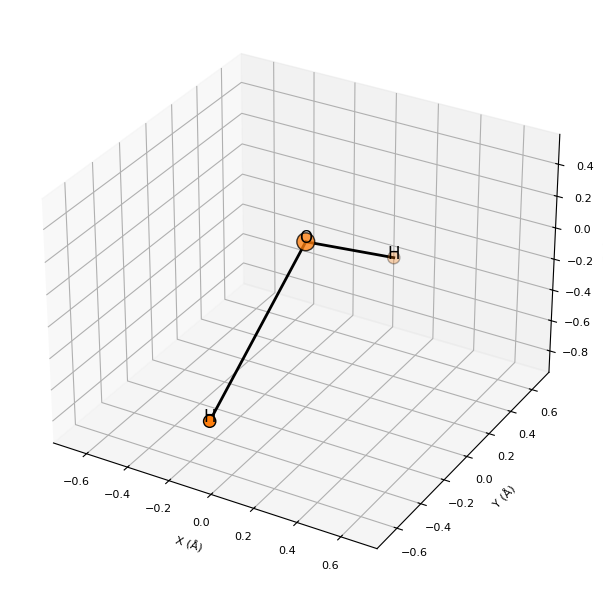

In [24]:
# Celda añadida: Plot 3D de la molécula (posiciones y enlaces)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from ase.data import covalent_radii
from ase.build import molecule

# Usar `atoms` si existe, sino crear CO2 como respaldo
try:
    atoms
except NameError:
    atoms = molecule('CO2')

pos = atoms.get_positions()
symbols = atoms.get_chemical_symbols()
nums = atoms.get_atomic_numbers()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

x, y, z = pos[:,0], pos[:,1], pos[:,2]
# Tamaño relativo de los puntos (escalado para verse bien)
sizes = covalent_radii[nums] * 250

ax.scatter(x, y, z, s=sizes, c='tab:orange', edgecolors='k')

# Etiquetas con símbolo del elemento
for i, sym in enumerate(symbols):
    ax.text(x[i], y[i], z[i], sym, color='k', fontsize=12, horizontalalignment='center')

# Dibujar enlaces simples por distancia (umbral basado en radios covalentes)
n = len(pos)
for i in range(n):
    for j in range(i+1, n):
        d = np.linalg.norm(pos[i] - pos[j])
        if d < (covalent_radii[nums[i]] + covalent_radii[nums[j]] + 0.45):
            ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], color='k', linewidth=2)

# Igualar escalas de los ejes para que la molécula no se vea deformada
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max()
mid_x = 0.5 * (x.max() + x.min())
mid_y = 0.5 * (y.max() + y.min())
mid_z = 0.5 * (z.max() + z.min())
ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

ax.set_xlabel('X (Å)')
ax.set_ylabel('Y (Å)')
ax.set_zlabel('Z (Å)')
plt.tight_layout()
plt.show()